In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("IBM.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#drop the variables which, in my opinion, do not add value to our analysis 
data = data.drop(["DailyRate","EmployeeCount","EmployeeNumber","HourlyRate","MonthlyRate","Over18","StandardHours"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [4]:
#get dummies to explore the options each variable has and later join the resulted dummies to our data
BusinessTravel = pd.get_dummies(data["BusinessTravel"])
Department = pd.get_dummies(data["Department"])
EducationField = pd.get_dummies(data["EducationField"])
Gender = pd.get_dummies(data["Gender"])
JobRole=pd.get_dummies(data["JobRole"])
MaritalStatus=pd.get_dummies(data["MaritalStatus"])

In [5]:
#to see whether all variables are in a numerical form (except dummies) or we yet have some work to do 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike           1470 non-null int64
PerformanceRating    

In [6]:
#Attrition and OverTime variables should be converted into a numerical form
data["Attrition"] = data["Attrition"].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [7]:
data["OverTime"] = data["OverTime"].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [10]:
#Attrition (dependent variable) should be brought forward
cols=data.columns.tolist()

In [11]:
cols.insert(0,cols.pop(cols.index('Attrition')))

In [12]:
data=data.reindex(columns=cols)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [13]:
data.corr()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.077924,-0.031373,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,0.043494,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,0.077924,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,-0.103369,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,-0.130016,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.169105,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.103481,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,-0.159840,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.043494,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,...,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319


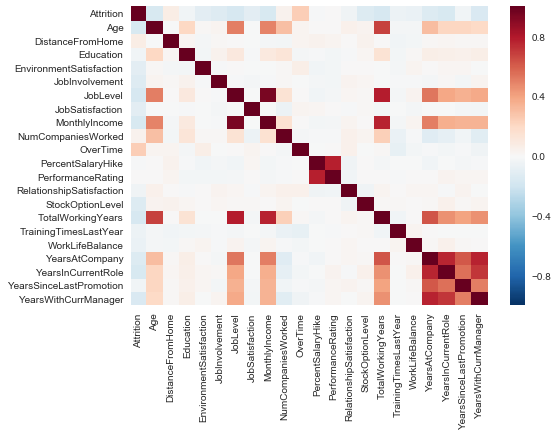

In [14]:
sns.heatmap(data.corr())
plt.show()

In [15]:
#drop one of the variables because of high correlation with another or more than one variable
#high corr between TotalWorkingYears and MonthlyIncome and Age
#high corr between PercentSalaryHike and PerformanceRating 
#high corr among YearsAtCompany and JobLevel MonthlyIncome
#high corr among YearsInCurrentRole and YearsAtCompany and YearsSinceLastPromotion and YearsWithCurrManager 
data = data.drop(["TotalWorkingYears","PercentSalaryHike","YearsAtCompany","JobLevel","YearsWithCurrManager"],axis=1)

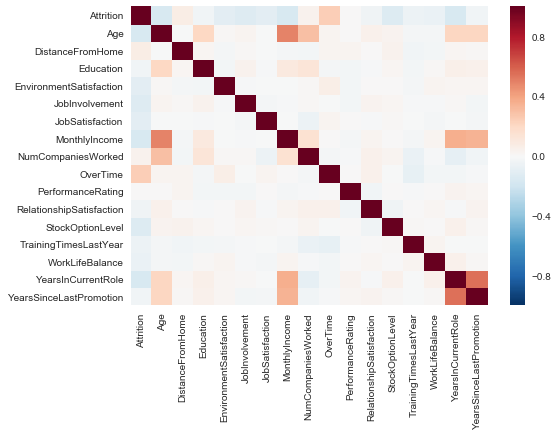

In [16]:
sns.heatmap(data.corr())
plt.show()

In [17]:
data = data.join(BusinessTravel)

In [18]:
data = data.join(Department)

In [19]:
data = data.join(EducationField)

In [20]:
data = data.join(Gender)

In [21]:
data = data.join(JobRole)

In [22]:
data = data.join(MaritalStatus)

In [23]:
data = data.drop(["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus"],axis=1)
data.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,1,41,1,2,2,3,4,5993,8,1,...,0,0,0,0,0,1,0,0,0,1
1,0,49,8,1,3,2,2,5130,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,37,2,2,4,2,3,2090,6,1,...,1,0,0,0,0,0,0,0,0,1
3,0,33,3,4,4,3,3,2909,1,1,...,0,0,0,0,1,0,0,0,1,0
4,0,27,2,1,1,3,2,3468,9,0,...,1,0,0,0,0,0,0,0,1,0


In [24]:
#to avoid dummy variable trap we should drop the following
data = data.drop(["Non-Travel","Human Resources Department","Other","Male","Sales Executive","Divorced"],axis=1)
data.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,Healthcare Representative,Human Resources Job,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Representative,Married,Single
0,1,41,1,2,2,3,4,5993,8,1,...,0,0,0,0,0,0,0,0,0,1
1,0,49,8,1,3,2,2,5130,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,37,2,2,4,2,3,2090,6,1,...,0,0,1,0,0,0,0,0,0,1
3,0,33,3,4,4,3,3,2909,1,1,...,0,0,0,0,0,0,1,0,1,0
4,0,27,2,1,1,3,2,3468,9,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
#so we get 16.1% attrition and 83.9% retention rates 
data["Attrition"].value_counts()/len(data)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [27]:
model = DecisionTreeClassifier(random_state=42)

In [28]:
inputs = data.iloc[:,1:]
output = data["Attrition"]

In [29]:
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [30]:
model.score(inputs,output)*100

100.0

In [35]:
from sklearn.tree import export_graphviz

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
export_graphviz(model,"silvia.dot")

In [44]:
modelFit = DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data,test_size=0.2)

C:\Users\Mi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
train, test = train_test_split(data,train_size=0.8)

In [47]:
model_K = DecisionTreeClassifier(max_depth=5, random_state=42)

In [48]:
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.8)

In [49]:
model_K.fit(inputs_train,output_train)
model_K.score(inputs_test,output_test)*100

81.972789115646265

In [50]:
export_graphviz(model_K,"tree_K.dot")

In [51]:
df = pd.DataFrame(index=list(data)[1:],data=model.feature_importances_)
df

,0
Age,0.069108
DistanceFromHome,0.040016
Education,0.037357
EnvironmentSatisfaction,0.054522
JobInvolvement,0.030542
JobSatisfaction,0.035069
MonthlyIncome,0.185747
NumCompaniesWorked,0.038461
OverTime,0.060574
PerformanceRating,0.000000


In [52]:
df.sort_values(by=0, ascending=False)

,0
MonthlyIncome,0.185747
Age,0.069108
YearsInCurrentRole,0.064085
OverTime,0.060574
YearsSinceLastPromotion,0.059504
EnvironmentSatisfaction,0.054522
WorkLifeBalance,0.053671
DistanceFromHome,0.040016
NumCompaniesWorked,0.038461
Education,0.037357


In [53]:
model.predict([41,1,2,2,3,3,4,5993,8,1,3,1,0,0,1,4,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1]) 

C:\Users\Mi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int8)